# Download from database with geometry

Notebook that tests the access to the information from the database using a polygon geometry.

## Import used modules

In [53]:
import os
import sys

import pandas as pd
import geopandas as gpd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Download municipality geometry

In [64]:
gdf = aup.gdf_from_db("mpos_2020", "marco")
m = ['01001','01005','01011']
mun_gdf = gpd.GeoDataFrame()
for mun in m:
    mun_gdf = mun_gdf.append(gdf.loc[gdf.CVEGEO == mun])
mun_gdf.head(1)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."


<AxesSubplot:>

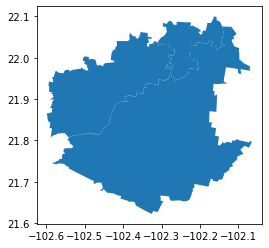

In [65]:
mun_gdf.plot()

<AxesSubplot:>

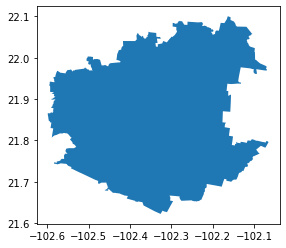

In [56]:
mun_gdf.dissolve().plot()

## Creating the query

In [58]:
mun_gdf.dissolve().geometry.to_wkt()[0]
query = f"SELECT * FROM osmnx_new.nodes WHERE ST_Intersects(geometry, \'SRID=4326;{mun_gdf.dissolve().geometry.to_wkt()[0]}\')"
nodes = aup.gdf_from_query(query, geometry_col='geometry')

<AxesSubplot:>

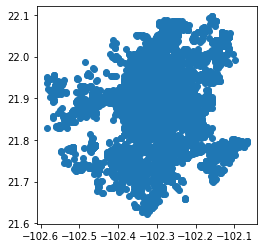

In [59]:
nodes.plot()

## Testing with MultiPolygon

<AxesSubplot:>

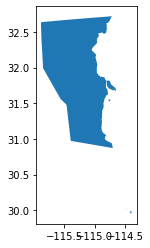

In [60]:
mun_gdf = gdf.loc[gdf.CVEGEO == '02002']
mun_gdf.plot()

<AxesSubplot:>

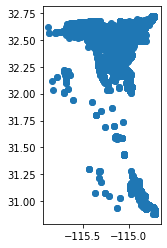

In [61]:
poly_wkt = mun_gdf.dissolve().geometry.to_wkt()[0]
query = f"SELECT * FROM osmnx_new.nodes WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
nodes = aup.gdf_from_query(query, geometry_col='geometry')
nodes.plot()